# Data mining assignment 3
*Michał Wiliński (151938)*

## First, I will inspect the dataset

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
random_state = 42
np.random.seed(random_state)
sns.set()
from warnings import filterwarnings as stfu
stfu('ignore')

In [81]:
df_data = pd.read_csv('data/data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_data.drop('id', axis=1, inplace=True)
df_data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,5,13,6,6,-0.469819,0.358126,1.068105,-0.559650,-0.366905,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,4,6,16,9,0.591035,-0.396915,0.145834,-0.030798,0.471167,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,8,9,3,11,-0.679875,0.469326,0.349843,-0.288042,0.291470,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,8,9,6,4,-0.389456,0.626762,-1.074543,-1.521753,-1.150806,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,3,1,13,11,-0.120743,-0.615578,-1.064359,0.444142,0.428327,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


As visible - columns f_07 to f_13 are categorical ordered features, the rest is numerical.

In [82]:
df_data.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,8.057878,8.084990,7.076388,6.286102,0.003413,-0.002639,0.005404,0.001656,-0.005399,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,4.700226,4.197106,4.433308,4.120077,0.998940,1.001096,1.003277,1.001258,0.995965,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.377021,-4.535903,-4.182233,-4.468930,-4.149688,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,-0.671810,-0.677757,-0.671055,-0.672635,-0.680243,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,7.000000,8.000000,6.000000,6.000000,0.003536,-0.004299,0.006535,0.001663,-0.001574,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,11.000000,11.000000,10.000000,9.000000,0.678679,0.673859,0.680903,0.673174,0.666996,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,36.000000,28.000000,38.000000,30.000000,4.490521,4.270708,4.157538,4.230849,4.710316,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [83]:
print(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06'] + [f'f_{i}' for i in range(14, 29)])

['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']


Now, we should check the distributions of features

array([[<AxesSubplot: title={'center': 'f_00'}>,
        <AxesSubplot: title={'center': 'f_01'}>,
        <AxesSubplot: title={'center': 'f_02'}>,
        <AxesSubplot: title={'center': 'f_03'}>,
        <AxesSubplot: title={'center': 'f_04'}>],
       [<AxesSubplot: title={'center': 'f_05'}>,
        <AxesSubplot: title={'center': 'f_06'}>,
        <AxesSubplot: title={'center': 'f_07'}>,
        <AxesSubplot: title={'center': 'f_08'}>,
        <AxesSubplot: title={'center': 'f_09'}>],
       [<AxesSubplot: title={'center': 'f_10'}>,
        <AxesSubplot: title={'center': 'f_11'}>,
        <AxesSubplot: title={'center': 'f_12'}>,
        <AxesSubplot: title={'center': 'f_13'}>,
        <AxesSubplot: title={'center': 'f_14'}>],
       [<AxesSubplot: title={'center': 'f_15'}>,
        <AxesSubplot: title={'center': 'f_16'}>,
        <AxesSubplot: title={'center': 'f_17'}>,
        <AxesSubplot: title={'center': 'f_18'}>,
        <AxesSubplot: title={'center': 'f_19'}>],
       [<AxesSub

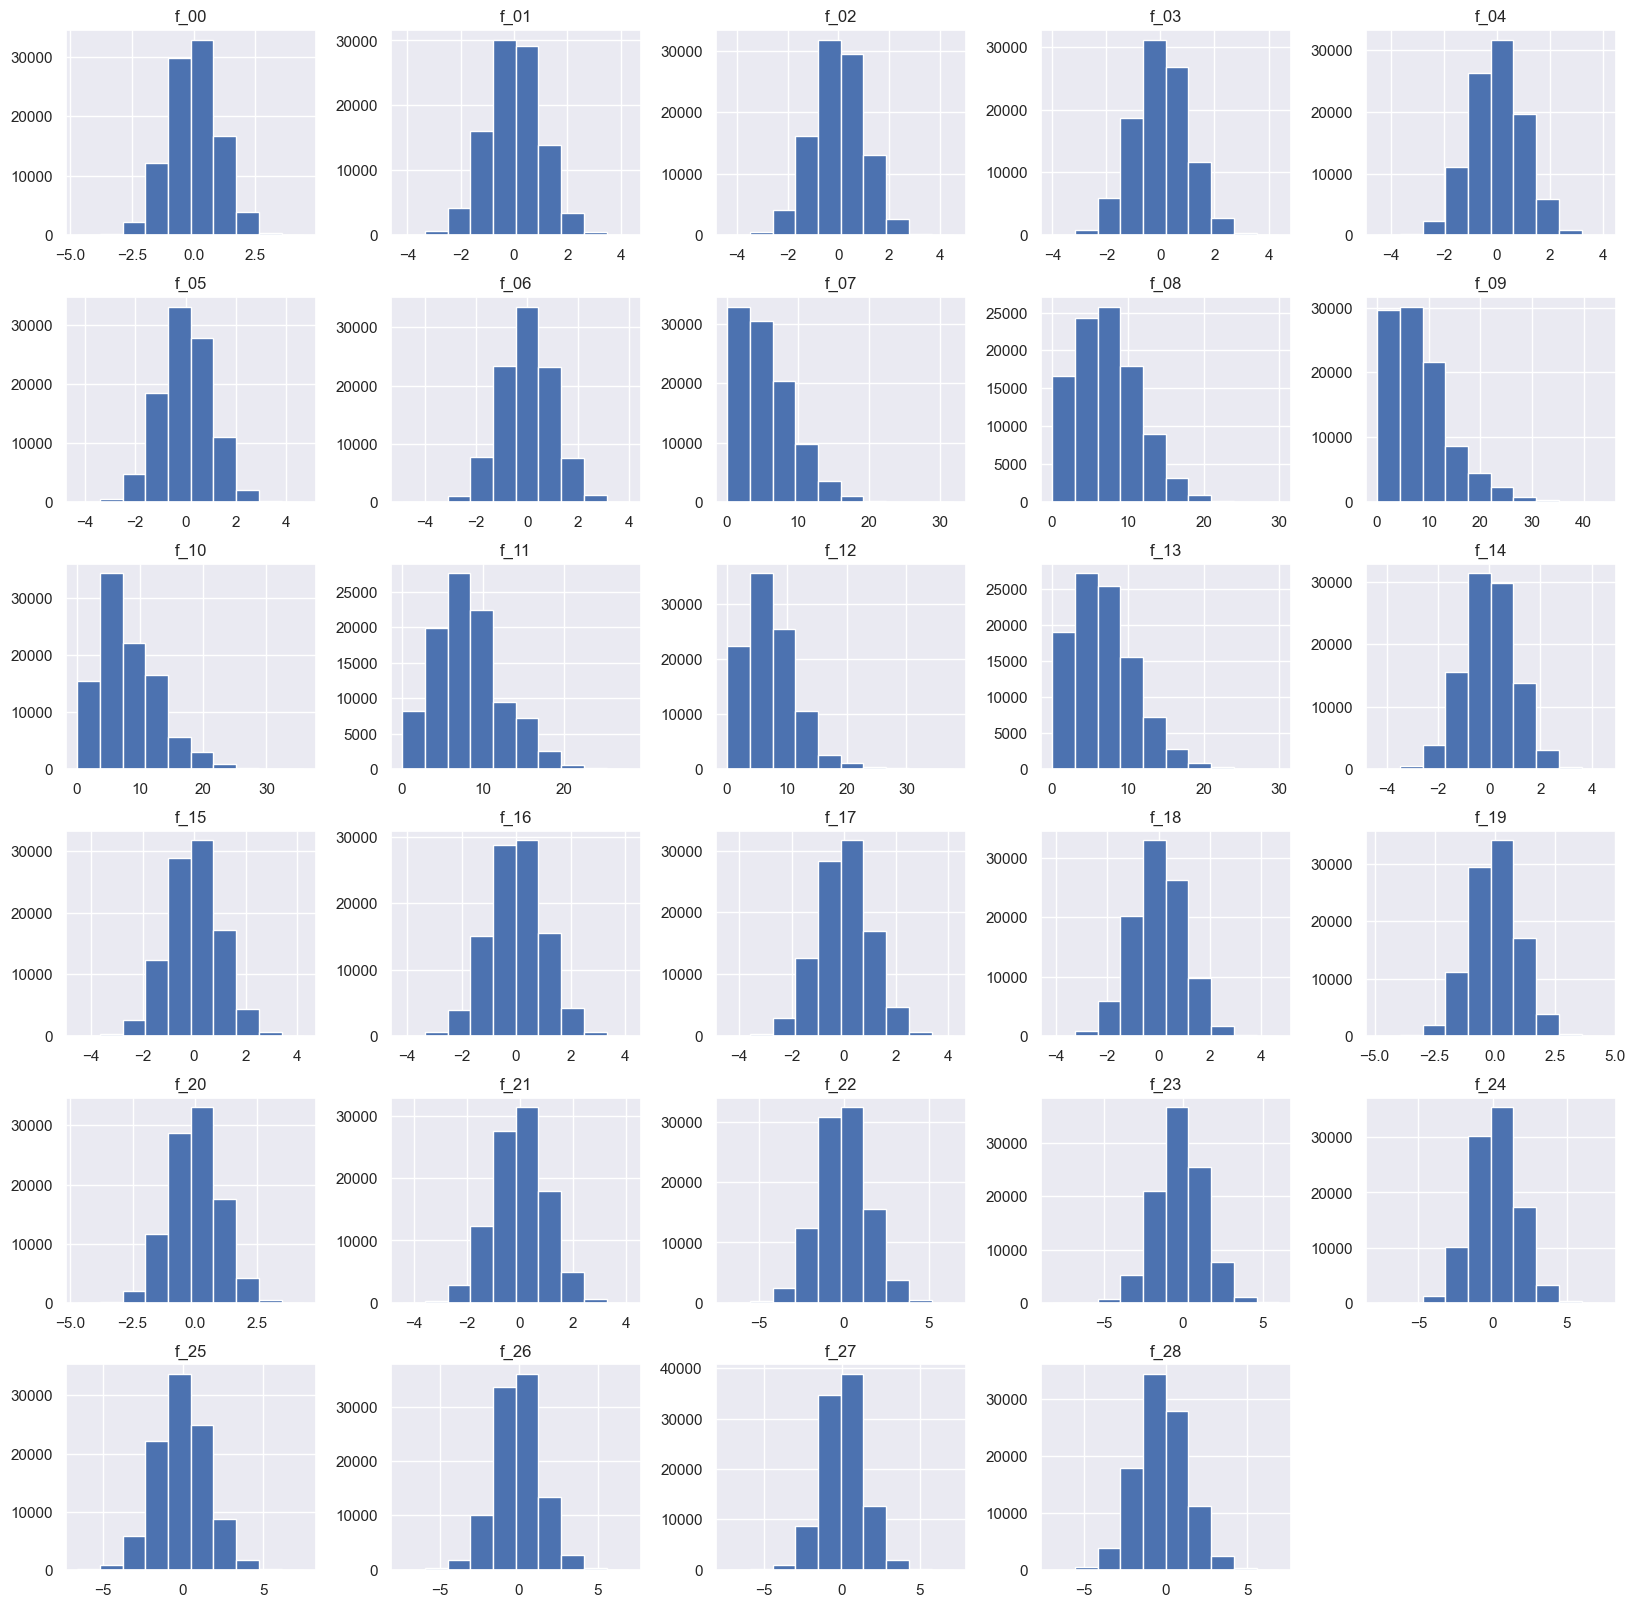

In [84]:
df_data.hist(figsize=(20, 20))

Most of the features are normally distributed, but we also have some skewed features. We will have to deal with them later.

<AxesSubplot: >

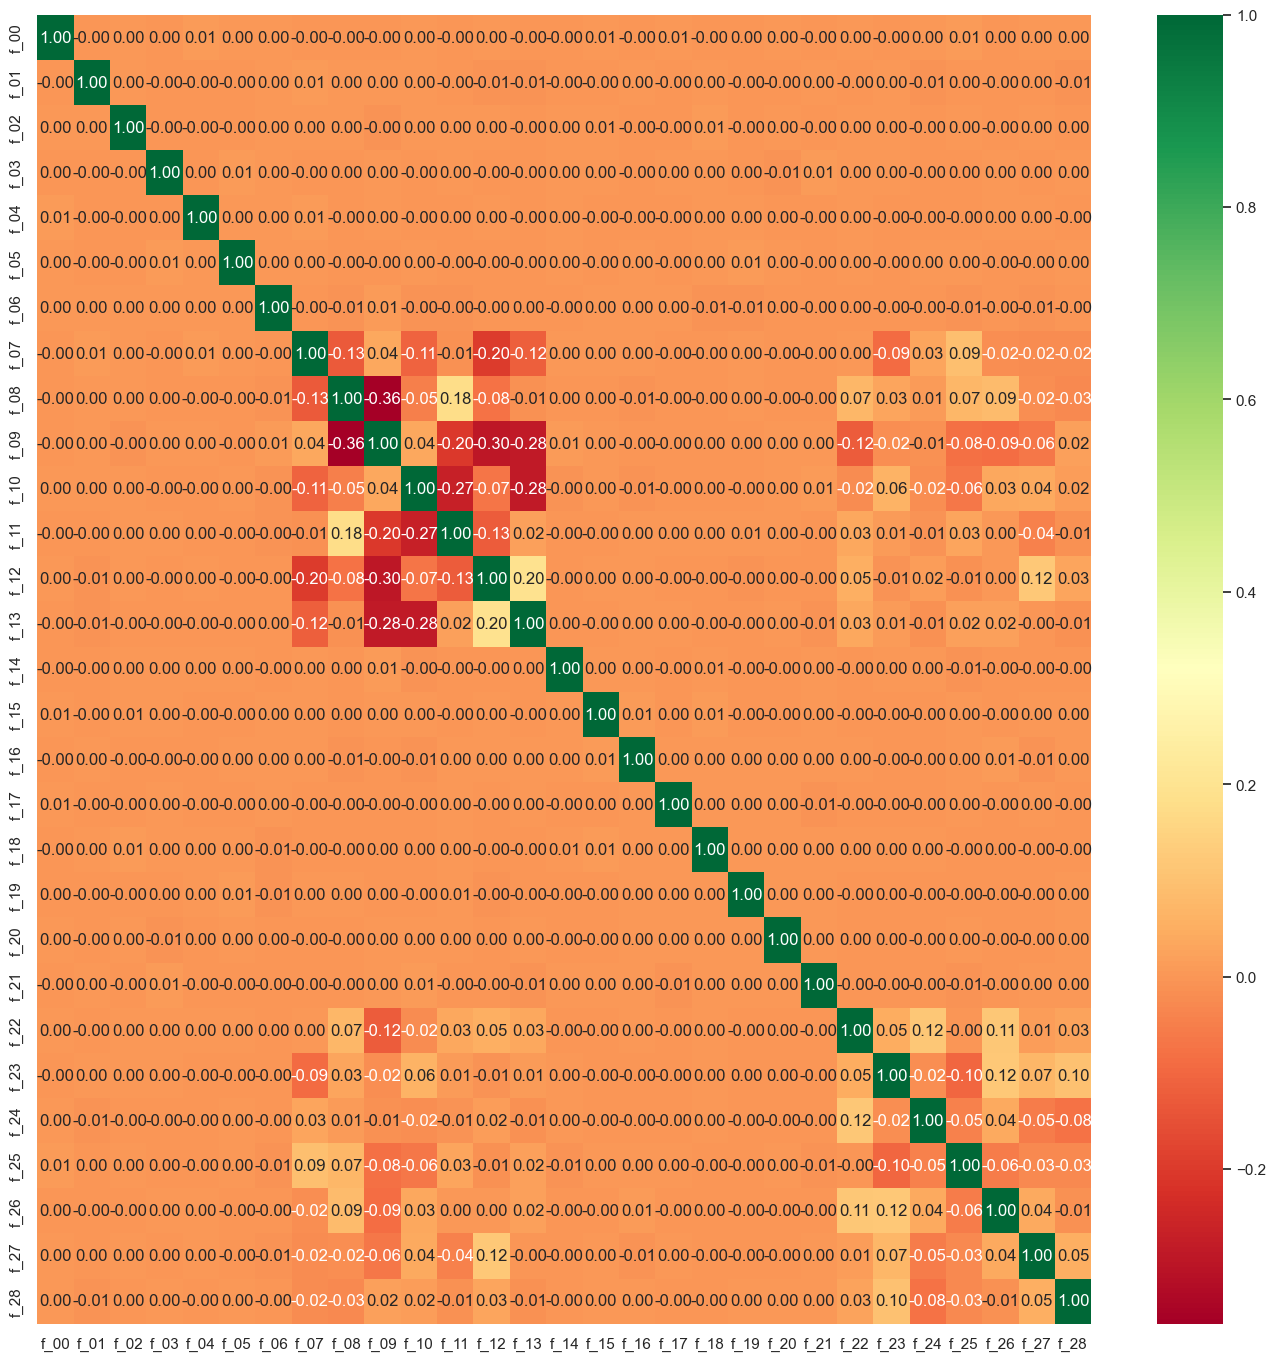

In [85]:
plt.figure(figsize=(17, 17))
sns.heatmap(df_data.corr(), annot=True, fmt='.2f', cmap='RdYlGn')

A negtive correlation is observed in pair f_09, f_08. Summing up the quick overview of the dataset, we can say that we have 2 group of attributes to deal with in the normalization schema proposal:
 - categorical ordered features whicha are skewed
 - normally distributed numerical features

## Normalization schema proposal
For categorical ordered features, the best is to leave them, but I want to experiment with Box-Cox transformation for numerical features. I will use the following formula:
$$
x_i^{(\lambda)} = \begin{cases}
\frac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(x_i) & \text{if } \lambda = 0
\end{cases}
$$
The real valued, normally distributed features will be transformed using standard scaler, making them have mean 0 and variance 1.

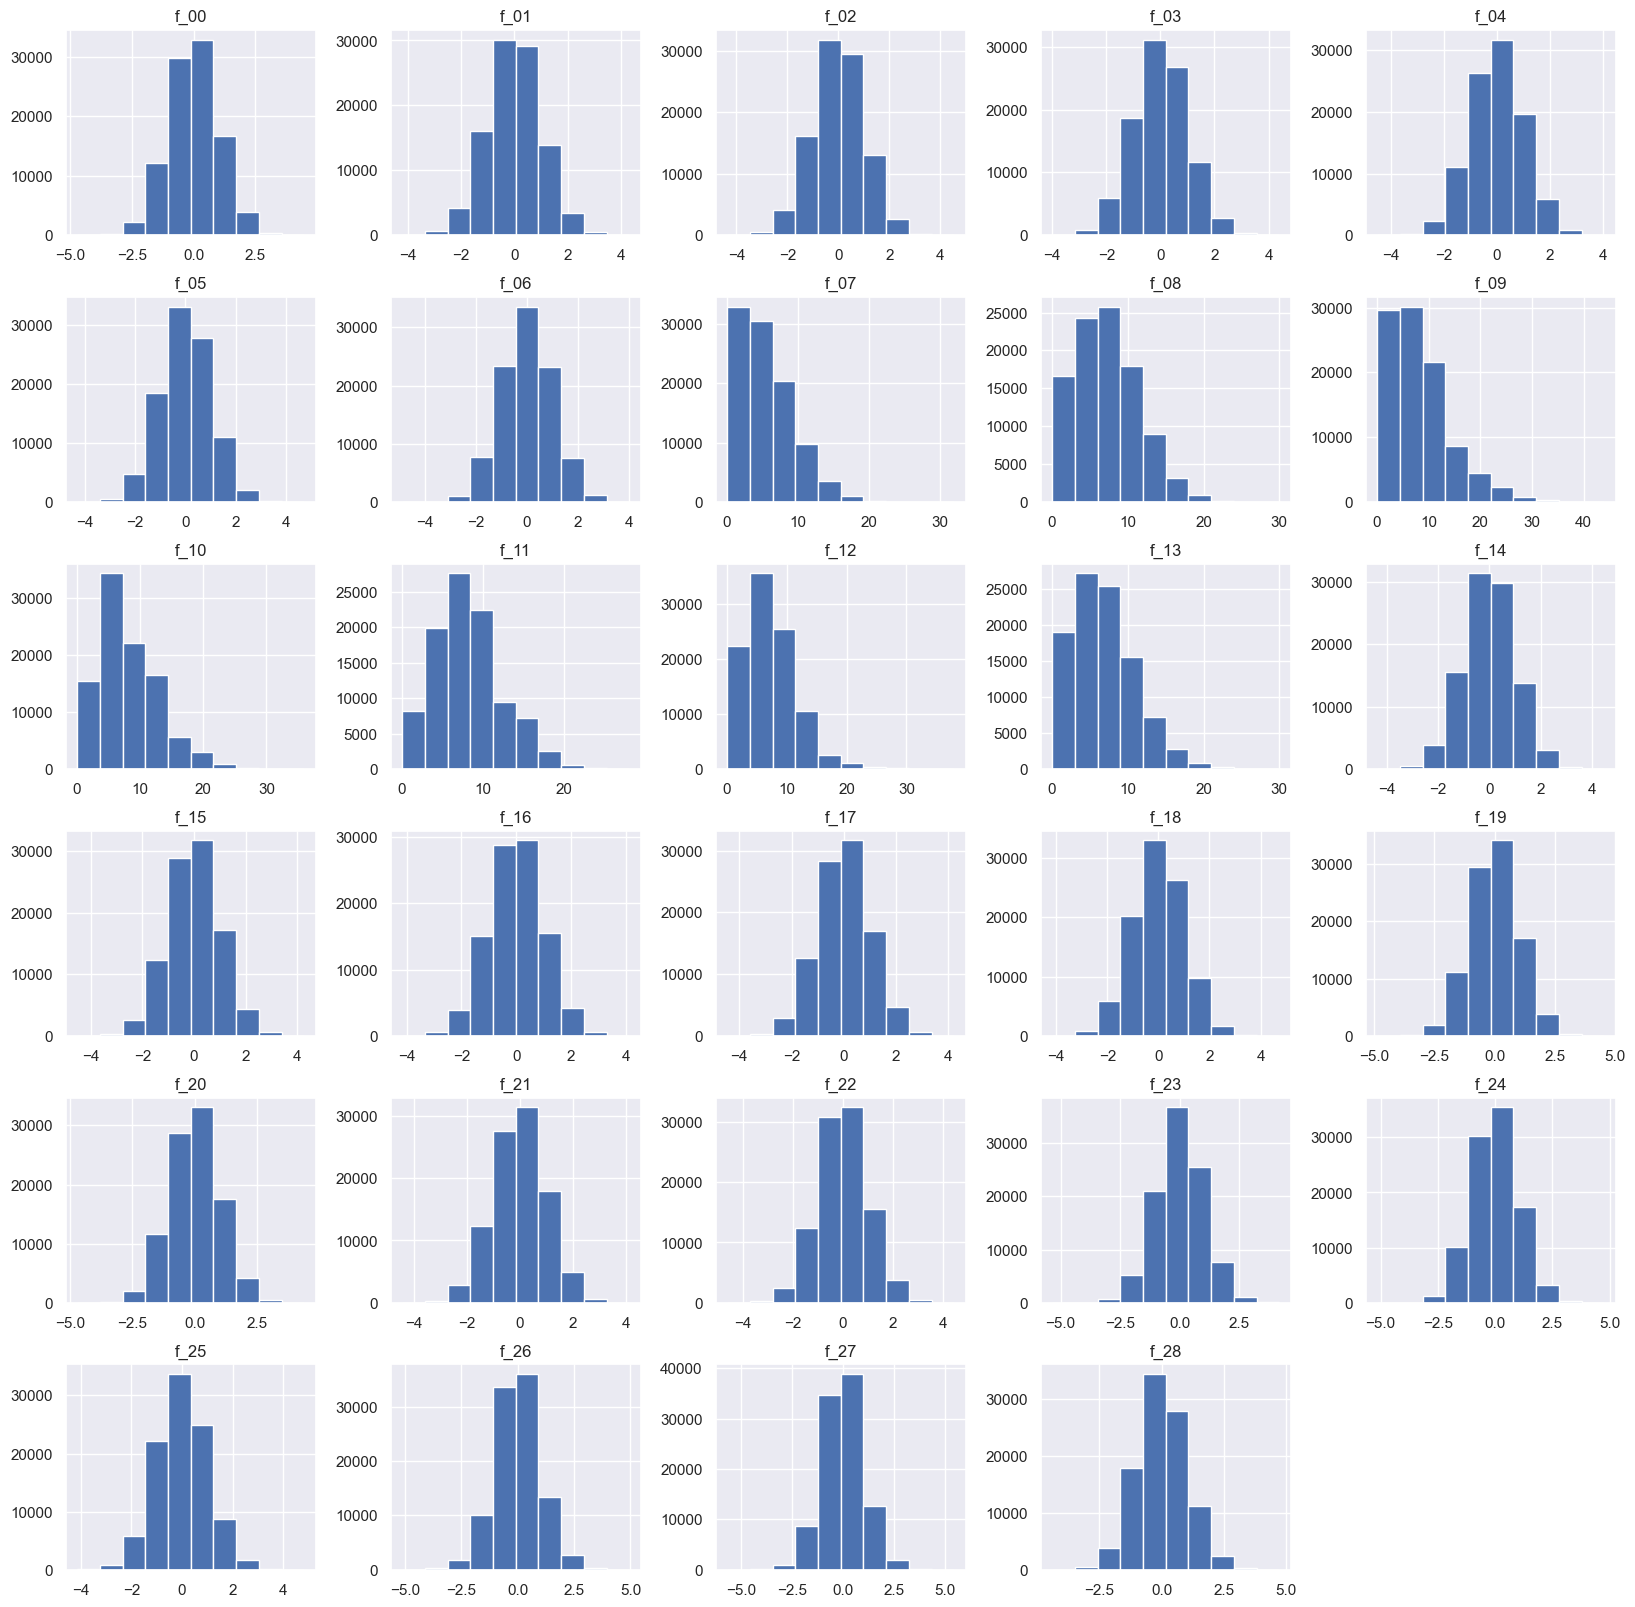

In [86]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

skewedcat = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
realvnrom = ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06'] + [f'f_{i}' for i in range(14, 29)]

def schema1(data):
    """
        # SCHEMA 1  # standard on normal real valued
    """

    std_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    data[realvnrom] = std_scaler.fit_transform(data[realvnrom])

    return data

def schema2(data):
    """
        # SCHEMA 2  # standard on normal real valued, boxcox on skewed categorical
    """

    std_scaler = StandardScaler()

    data[realvnrom] = std_scaler.fit_transform(data[realvnrom])

    data[skewedcat] = data[skewedcat].apply(lambda x: boxcox(x + 1)[0])

    return data

def schema3(data):
    """
        # SCHEMA 3  # minmax on normal real valued, standard on skewed categorical
    """

    minmax_scaler = MinMaxScaler()
    std_scaler = StandardScaler()

    data[realvnrom] = minmax_scaler.fit_transform(data[realvnrom])

    data[skewedcat] = std_scaler.fit_transform(data[skewedcat])

    return data

df_data = schema1(df_data)

df_data.to_csv('data/data_normalized.csv', index=False)
plot = df_data.hist(figsize=(20, 20))

## Dimensionality reduction

I will use PCA to reduce the dimensionality of the dataset.

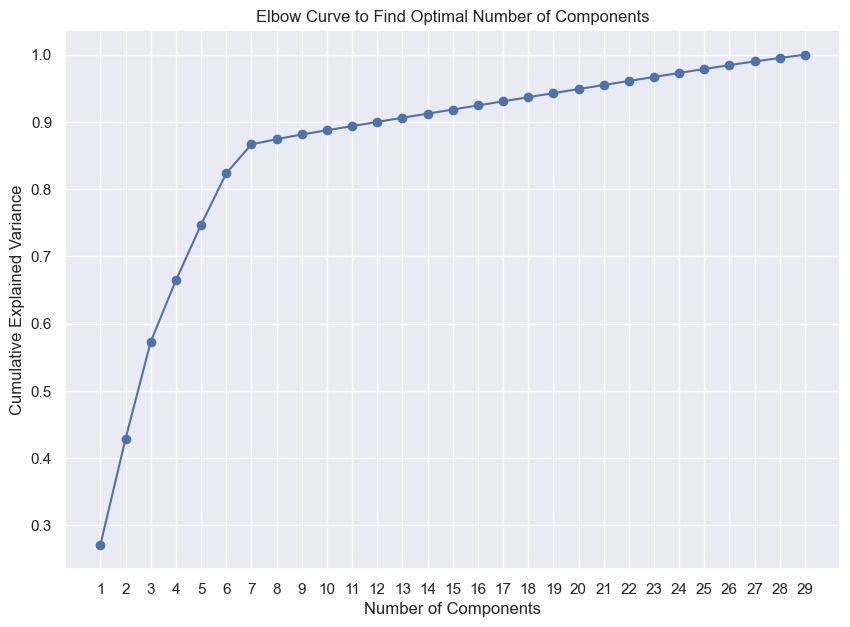

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

def find_optimal_components(data, random_state=None):
    pca = PCA(random_state=random_state)
    pca.fit(data)

    cum_explained_var = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(10, 7))
    plt.plot(range(1, len(cum_explained_var)+1), cum_explained_var, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.title('Elbow Curve to Find Optimal Number of Components')
    plt.xticks(range(1, len(cum_explained_var)+1))
    plt.show()

find_optimal_components(df_data, random_state=random_state)


Around 20 components we explain around 90% of the variance, so I will use 20 components.

In [88]:
final_PCA = PCA(n_components=7, random_state=random_state)
final_PCA.fit_transform(df_data)
print(f"Explained variance: {np.sum(final_PCA.explained_variance_ratio_)}")
df_data.to_csv('data/data_reduced.csv', index=False)

Explained variance: 0.8664974965562101


## Now, let's cluster the data!

First - K means clustering. I will use silhouette score and db score to evaluate the clustering.

  0%|          | 0/19 [00:00<?, ?it/s]

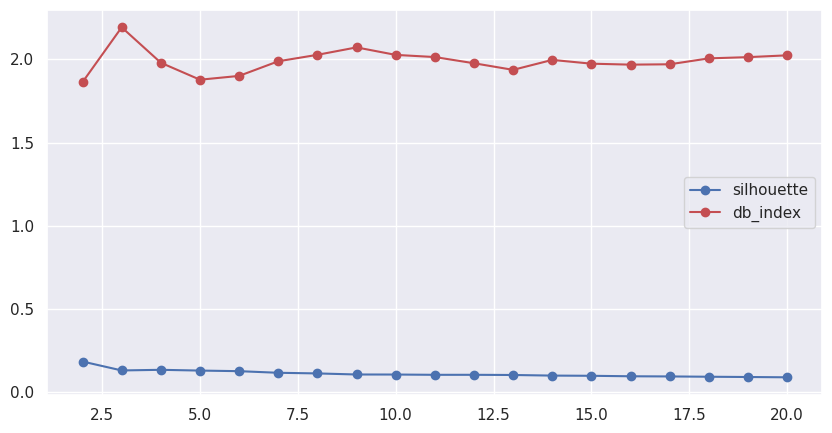

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

from tqdm.notebook import tqdm
silhouette_scores = []
db_scores = []

clusters_range = range(2, 21)

df_data = df_data.sample(frac=0.4, random_state=random_state)

for n_clusters in tqdm(clusters_range):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(df_data.values, None)
    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(df_data, labels, metric='euclidean'))
    db_scores.append(davies_bouldin_score(df_data, labels))


plt.figure(figsize=(10,5))
plt.plot(clusters_range, silhouette_scores, 'bo-', label='silhouette')
plt.plot(clusters_range, db_scores, 'ro-', label='db_index')
plt.legend()
plt.show()

## Visualizing the clusters

In [89]:
from mpl_toolkits.mplot3d import Axes3D
df_data = pd.read_csv('data/data_reduced.csv')

def plot_3d_clusters(X, labels, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
    
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(title)

    plt.show()

First, the K means clustering. I am using PCA with 3 components to visualize the clusters in 3D.

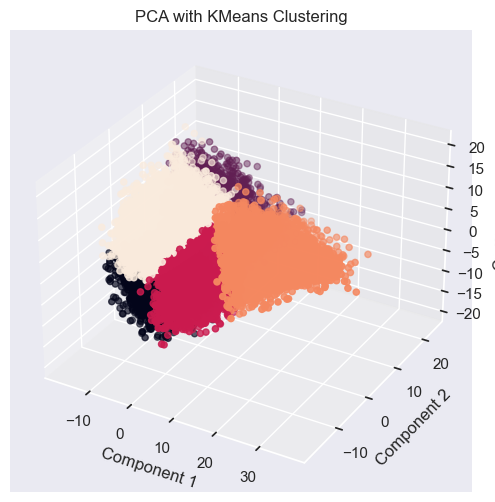

In [90]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_data)

kmeans = KMeans(n_clusters=5)
labels_kmeans = kmeans.fit_predict(X_pca)

plot_3d_clusters(X_pca, labels_kmeans, 'PCA with KMeans Clustering')

And now, DBSCAN. I am using again PCA with 3 components to visualize the clusters in 3D.

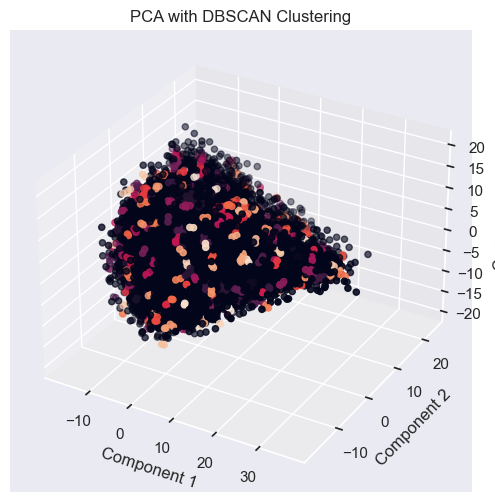

In [92]:
from sklearn.cluster import DBSCAN
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_data)

dbscan = DBSCAN(eps=1, min_samples=2)
labels_dbscan = dbscan.fit_predict(X_pca)

plot_3d_clusters(X_pca, labels_dbscan, 'PCA with DBSCAN Clustering')

And now, let me visulize the similarity between the clusters.

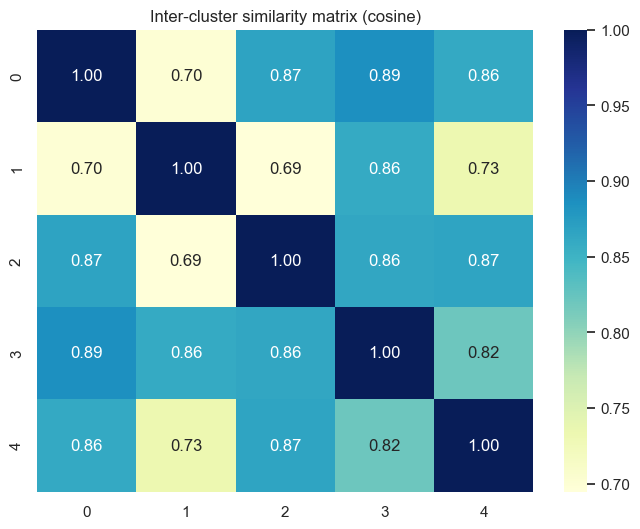

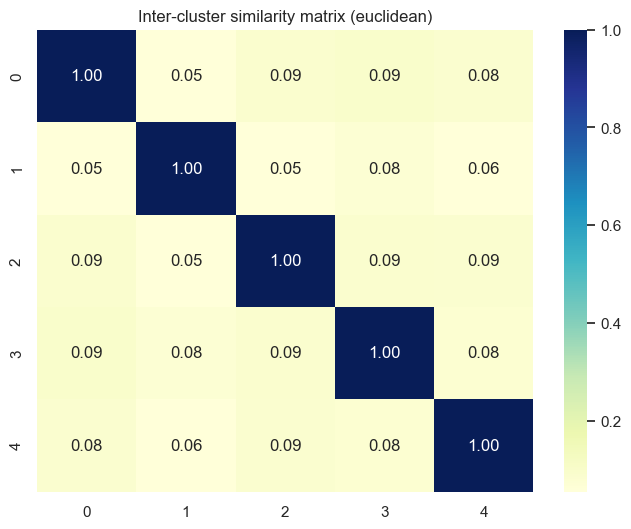

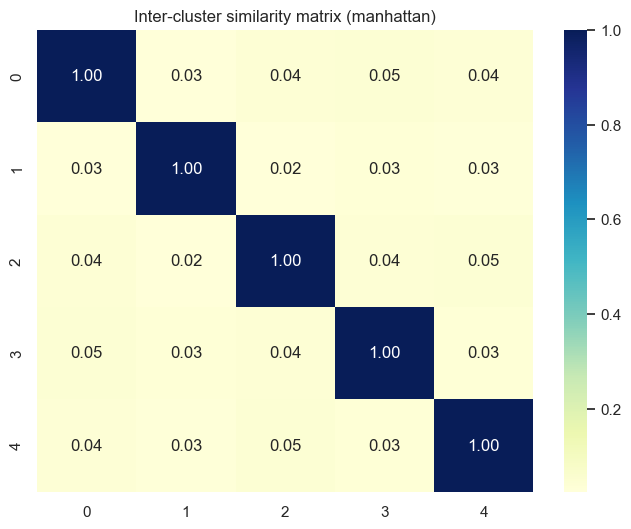

In [93]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_inter_cluster_similarity_kmeans(kmeans_model, metric = 'cosine'):
    cluster_centers = kmeans_model.cluster_centers_
    
    if metric == 'cosine':
        similarity_matrix = cosine_similarity(cluster_centers)
    elif metric == 'euclidean':
        similarity_matrix = 1 / (1 + euclidean_distances(cluster_centers))
    elif metric == 'manhattan':
        similarity_matrix = 1 / (1 + manhattan_distances(cluster_centers))

    plt.figure(figsize=(8,6))
    sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"Inter-cluster similarity matrix ({metric})")
    plt.show()

kmeans = KMeans(n_clusters=5).fit(df_data)
visualize_inter_cluster_similarity_kmeans(kmeans, metric='cosine')
visualize_inter_cluster_similarity_kmeans(kmeans, metric='euclidean')
visualize_inter_cluster_similarity_kmeans(kmeans, metric='manhattan')

## Analysis of the results
Upon reviewing the results of the clustering analysis using K-Means and DBSCAN, it can be concluded that these techniques provided relatively poor results in the given context. DBSCAN doesn't even yield any interpretable and reasonable results, that's why I don't provide inter-cluster similarity. This poor performance could be attributed to several factors:

- **Applicability of Methods**: It's possible that the chosen methods weren't the most suitable for this specific dataset. Clustering algorithms such as Gaussian Mixture Models or Spectral Clustering could potentially perform better due to their different assumptions and methodologies.
  
- **Normalization Process**: The data normalization approach may have introduced errors or biases into the clustering process, influencing the results and making the outcome less accurate.
  
- **Computational Power**: The computational power at our disposal might not have been sufficient to explore the best parameters for the clustering methods fully. 

Upon review of the winning solution provided on Kaggle, it became apparent that the use of a custom Gaussian Mixture Model that took into account the specific structure and distributions of the data yielded superior results. Specifically, the winning model accounted for:

- **Data Structure**: Only 14 variables were considered relevant for the clustering, with seven of these being integers and the other seven being floating-point numbers. The integer variables were power-transformed to obtain a more 'normal' shape and treated as multivariate normal variables.
  
- **Cluster Structure**: The data was divided into 42 clusters, arranged as seven groups of six clusters each. For the integer variables, there were seven distinct cluster groups, with means and covariances seemingly independent across these groups.
  
- **Model Specification**: A custom Expectation Maximization (EM) algorithm was implemented for the Gaussian Mixture Model, which took into account the unique data and cluster structure. The means of all floating point variables were hard-coded to ensure convergence to true cluster centers.